### Tensorflow

In [1]:
# libraies
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# generating train and test data sets
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### Sequential 1: Model with no hidden layer           
Train for 10 epochs and output is softmax

In [3]:
# creating sequential model
model1 = Sequential()

# building model with no hidden layer
model1.add(Flatten(input_shape=[28, 28]))
model1.add(Dense(10, activation="softmax")) 

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


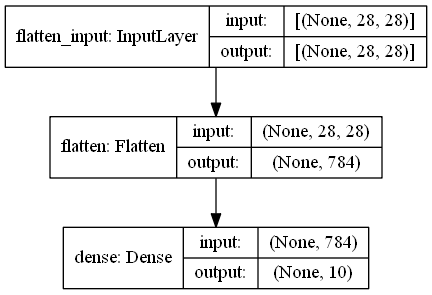

In [4]:
# plotting model
plot_model(model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

In [5]:
model1.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# training model with 10 epochs
h1 = model1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.1743 - accuracy: 0.6958 - val_loss: 0.4944 - val_accuracy: 0.8784
Epoch 2/10
1719/1719 [==============================] - 2s 904us/step - loss: 0.4943 - accuracy: 0.8731 - val_loss: 0.4073 - val_accuracy: 0.8948
Epoch 3/10
1719/1719 [==============================] - 2s 887us/step - loss: 0.4203 - accuracy: 0.8885 - val_loss: 0.3719 - val_accuracy: 0.9010
Epoch 4/10
1719/1719 [==============================] - 2s 894us/step - loss: 0.3862 - accuracy: 0.8949 - val_loss: 0.3507 - val_accuracy: 0.9062
Epoch 5/10
1719/1719 [==============================] - 2s 916us/step - loss: 0.3700 - accuracy: 0.8973 - val_loss: 0.3378 - val_accuracy: 0.9108
Epoch 6/10
1719/1719 [==============================] - 2s 884us/step - loss: 0.3583 - accuracy: 0.9016 - val_loss: 0.3273 - val_accuracy: 0.9110
Epoch 7/10
1719/1719 [==============================] - 1s 858us/step - loss: 0.3475 - accuracy: 0.9036 - val_loss: 0.3196 - v

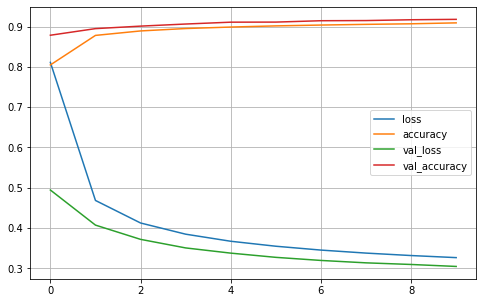

In [6]:
# plotting learning curve
pd.DataFrame(h1.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) 
plt.show()

### Sequential 2: Model with single hidden layer
Use sigmoid in hidden layer, train for 20 epochs

In [7]:
# generating sequential model
model2 = Sequential()

# building model with single layer
model2.add(Flatten(input_shape=[28, 28]))
model2.add(Dense(16, activation="sigmoid"))
model2.add(Dense(10, activation="softmax")) 

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


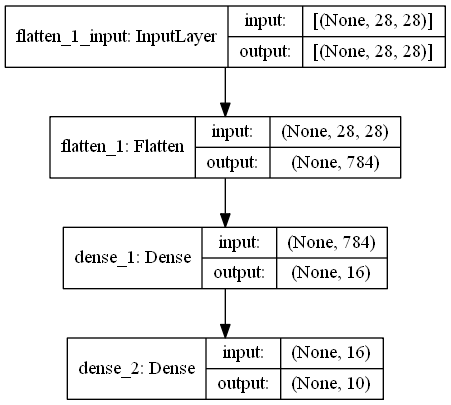

In [8]:
# plotting model
plot_model(model2, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# training model with 20 epochs
h2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 2s 1ms/step - loss: 2.0802 - accuracy: 0.4089 - val_loss: 1.4003 - val_accuracy: 0.7212
Epoch 2/20
1719/1719 [==============================] - 2s 906us/step - loss: 1.2752 - accuracy: 0.7446 - val_loss: 0.9537 - val_accuracy: 0.8002
Epoch 3/20
1719/1719 [==============================] - 2s 941us/step - loss: 0.9115 - accuracy: 0.8039 - val_loss: 0.7426 - val_accuracy: 0.8404
Epoch 4/20
1719/1719 [==============================] - 2s 926us/step - loss: 0.7282 - accuracy: 0.8387 - val_loss: 0.6202 - val_accuracy: 0.8626
Epoch 5/20
1719/1719 [==============================] - 2s 975us/step - loss: 0.6187 - accuracy: 0.8601 - val_loss: 0.5395 - val_accuracy: 0.8770
Epoch 6/20
1719/1719 [==============================] - 2s 916us/step - loss: 0.5451 - accuracy: 0.8732 - val_loss: 0.4834 - val_accuracy: 0.8876
Epoch 7/20
1719/1719 [==============================] - 2s 933us/step - loss: 0.4986 - accuracy: 0.8811 - val_loss: 0.4421 - v

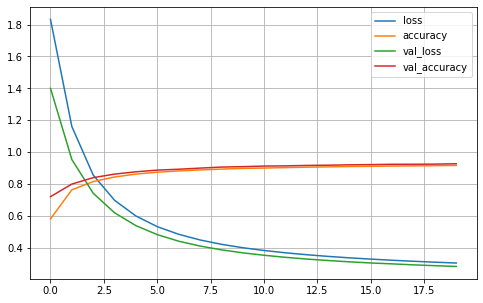

In [10]:
# plotting learning curve
pd.DataFrame(h2.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) 
plt.show()

### Sequential 3: Deep model
Use ReLU in hidden layer, train for 20 epochs

In [11]:
# generating sequential model
model3 = Sequential()

# building deep model
model3.add(Flatten(input_shape=[28, 28]))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(128, activation="relu")) 
model3.add(Dense(96, activation="relu")) 
model3.add(Dense(64, activation="relu")) 
model3.add(Dense(32, activation="relu")) 
model3.add(Dense(16, activation="relu")) 
model3.add(Dense(10, activation="softmax")) 

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                6208      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)               

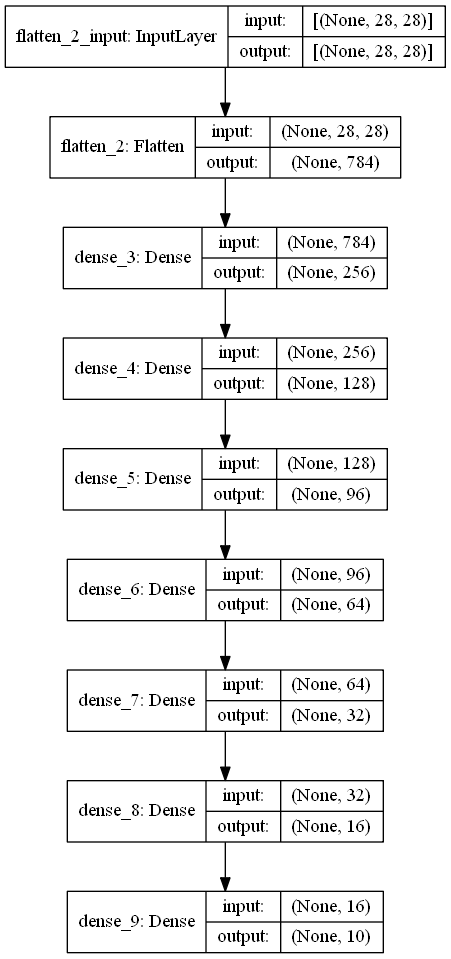

In [12]:
# plotting model
plot_model(model3, to_file='model3_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
model3.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# training model with 20 epochs
h3 = model3.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 1.6152 - accuracy: 0.4770 - val_loss: 0.3270 - val_accuracy: 0.9094
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3056 - accuracy: 0.9136 - val_loss: 0.2069 - val_accuracy: 0.9380 - loss: 0
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1951 - accuracy: 0.9441 - val_loss: 0.1586 - val_accuracy: 0.9560
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1348 - accuracy: 0.9605 - val_loss: 0.1354 - val_accuracy: 0.9580
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1073 - accuracy: 0.9685 - val_loss: 0.1234 - val_accuracy: 0.9630
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0820 - accuracy: 0.9758 - val_loss: 0.1021 - val_accuracy: 0.9696: 1s - loss: 0.0778 - accuracy - ETA: 1s - loss: 0.0787 - accuracy: 0.97 - ETA: 1s - loss: 0.0789 - accura - ETA: 1s - loss: - 

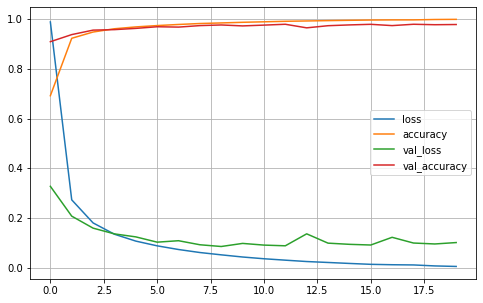

In [14]:
# plotting learning curve
pd.DataFrame(h3.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) 
plt.show()

### Functional: Complex deep model
Use sigmoid for layers within the blue box and use ReLU in the remaining hidden layers, train for 25 epochs

In [15]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import Model

In [16]:
# building functional deep model

# input layer
input_ = Input(shape=[28, 28])
flatten = Flatten(input_shape=[28, 28])(input_)

# left part
hidden0 = Dense(256, activation="relu")(flatten)
hidden1 = Dense(128, activation='relu')(hidden0)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)

# right part (blue box)
hidden4 = Dense(256, activation="sigmoid")(flatten)
hidden5 = Dense(128, activation='sigmoid')(hidden4)
hidden6 = Dense(32, activation='sigmoid')(hidden5)

# last part
concat_ = Concatenate()([hidden3, hidden6])
hidden7 = Dense(24, activation="relu")(concat_)
hidden8 = Dense(16, activation='relu')(hidden7)
output = Dense(10, activation='softmax')(hidden8)

# generating model
model4 = Model(inputs=[input_], outputs=[output] )

model4.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 256)          200960      flatten_3[0][0]                  
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 128)          32896       dense_10[0][0]                   
______________________________________________________________________________________________

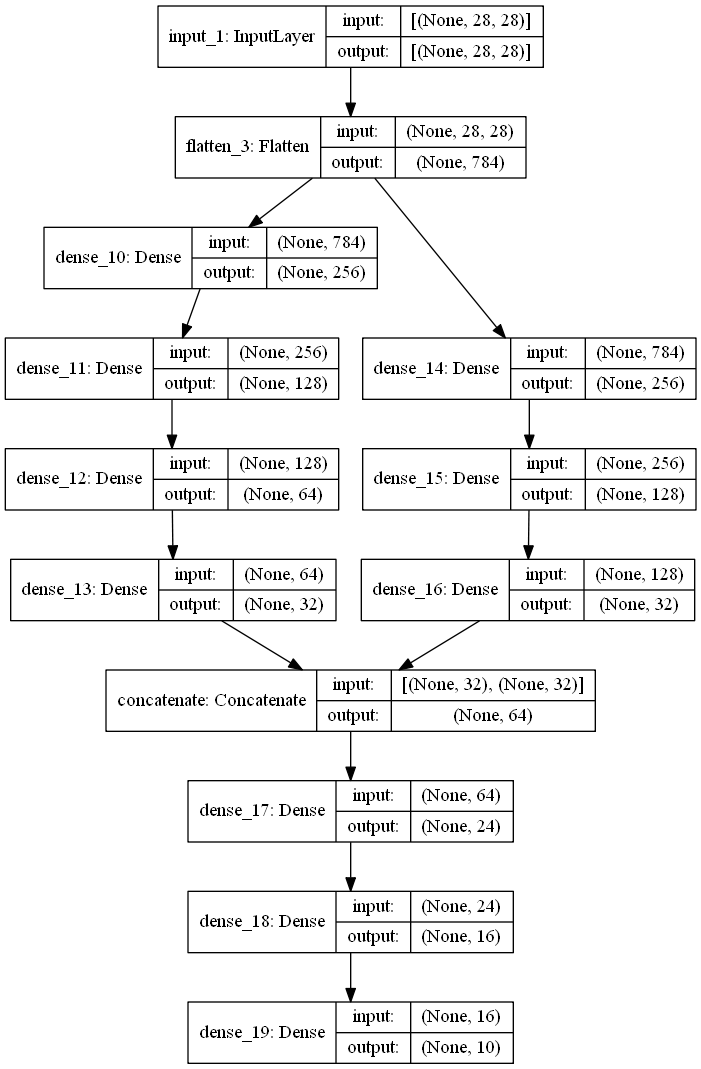

In [17]:
# plotting model
plot_model(model4, to_file='model4_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
model4.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# training model with 25 epochs
h4 = model4.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 1.7166 - accuracy: 0.3816 - val_loss: 0.4737 - val_accuracy: 0.8434
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3208 - accuracy: 0.9075 - val_loss: 0.2005 - val_accuracy: 0.9442
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2031 - accuracy: 0.9411 - val_loss: 0.1781 - val_accuracy: 0.9482
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1515 - accuracy: 0.9563 - val_loss: 0.1287 - val_accuracy: 0.9640
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1215 - accuracy: 0.9648 - val_loss: 0.1180 - val_accuracy: 0.9676
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1032 - accuracy: 0.9706 - val_loss: 0.1088 - val_accuracy: 0.9720
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0814 - accuracy: 0.9773 - val_loss: 0.1005 - val_accuracy:

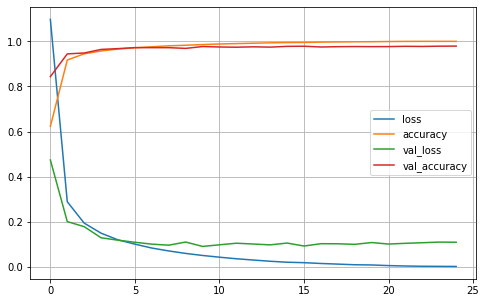

In [19]:
# plotting learning curve
pd.DataFrame(h4.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) 
plt.show()